Image Fourier Transform
=====
# Barry O'Donnell

## 26/02/2020

**Fourier Transforms** are a mathematical technique that can be used to distinguish dominant frequencies within a signal. This can be very helpful with signal and image analysis.

In this experiment, we are going to be observing the **Fourier Transform** of an image, and attempt to reduce or add noise to an image we have loaded.

In [1]:
## Begin by importing modules and functions needed to complete the assignment
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
from numpy.fft import fft2, fftshift, ifft2, ifftshift

-----------------

## Task 1

To begin, I design some various shapes that I will use later for my transform.

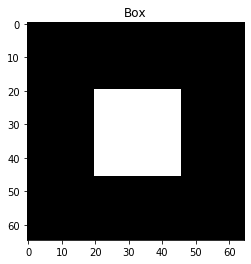

In [2]:
## Start out by defining the shape of the image

w, h = 65, 65
shape = [(20,20), (w-20, h-20)]

## Initialise a new 'image' with the previously stated shape
im1 = Image.new("I", (w,h))
img1 = ImageDraw.Draw(im1)
img1.rectangle(shape, fill='white', outline='white')

## Present the new image
plt.imshow(im1)
plt.title('Box')
plt.show()

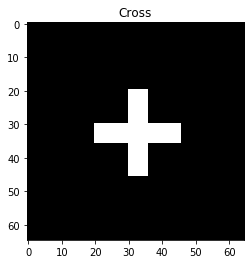

In [3]:
## Similar to above, define a more complicated shape
w, h = 65, 65
shape1 = [(30,20), (w-30, h-20)]
shape2 = [(20,30), (w-20, h-30)]

im2 = Image.new("I", (w,h))
img2 = ImageDraw.Draw(im2)
img2.rectangle(shape1, fill='white', outline='white')
img2.rectangle(shape2, fill='white', outline='white')

plt.imshow(im2)
plt.title('Cross')
plt.show()

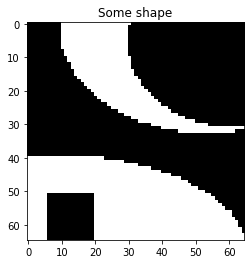

In [4]:
## etc. . .

## I purposely make this image not symmetrical for debugging later
w, h = 65, 65
shape1 = [(10, -(h//2)), (3*w//2, h//2)]
shape2 = [(-50, 40), (w, 3*h//2)]
shape3 = [(5, 50), (20, h)]
shape4 = [(30,-20), (90,30)]

im3 = Image.new("I", (w,h))
img3 = ImageDraw.Draw(im3)
img3.ellipse(shape1, fill='white', outline='white')
img3.ellipse(shape2, fill='white', outline='white')

img3.rectangle(shape3, fill='black', outline='white')
img3.ellipse(shape4, fill='black', outline='black')

plt.imshow(im3)
plt.title('Some shape')
plt.show()

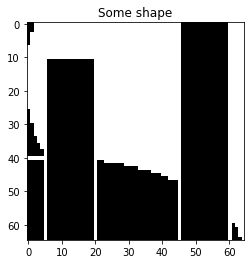

In [5]:
## etc. . .
w, h = 65, 65
shape1 = [(0, -(h//2)), (3*w//2, h)]
shape2 = [(-50, 40), (w, 3*h//2)]
shape3 = [(5, 10), (20, h)]
shape4 = [(45,-20), (60,h)]

im4 = Image.new("I", (w,h))
img4 = ImageDraw.Draw(im4)
img4.ellipse(shape1, fill='white', outline='white')
img4.ellipse(shape2, fill='black', outline='white')

img4.rectangle(shape3, fill='black', outline='white')
img4.rectangle(shape4, fill='black', outline='white')

plt.imshow(im4)
plt.title('Some shape')
plt.show()

-----------

## Task 2

Here we observe the **Fourier Transform** of an image that we input. We are also going to apply a ***Gaussian Filter*** to our image in hopes of smoothing out the sharp edges. To calculate the ***Gaussian Filter***, I am using the formula;

## $$ G_\sigma = \frac{1}{2 \pi \sigma^2}e^{-\frac{(x^2 + y^2)}{2 \sigma^2}} $$

Where;
- $G_\sigma$ is the ***Gaussian Function***
- $\sigma$ is the Standard Deviation
- $x$ and $y$ is the horizontal and vertical distance respectively from the origin


In [6]:
def gaussFilter(image, sigma=20):
    """Calculates the Gaussian Filter needed for some image of some shape
    args;
        image := image/array type, represents image
        sigma := float, the Standard Deviation
        
    Returns the Gaussian Filter"""
        
    ## Gets the Shape of the image
    h, w = np.shape(image)[0], np.shape(image)[1]
    
    ## Constructs an array for the filter
    gaussFilter = np.zeros((h, w))
    
    ## Calcualtes the partial sum of the Gaussian
    sum1 = 1 / (2 * np.pi * (sigma**2))
    
    ## Begins a 'for' loop to calculate the Gaussian Filter
    for i in range(h//2 , h):
        for j in range(w//2, w):
            y = (i-h//2)
            x = (j-h//2)
            ## Calculates the second partial sum
            sum2 = -(x**2 + y**2) / (2 * (sigma**2))
            
            ## Calculates the total sum
            totsum = sum1 * np.exp(sum2)
            
            ## Fills in the Gauss Filter
            gaussFilter[i][j] = totsum
            
            ## These values are just flipped and orientated differently totsum's
            gaussFilter[-i%(h//2)][-j%(w//2)] = totsum
            gaussFilter[i][-j%(w//2)] = totsum
            gaussFilter[-i%(h//2)][j] = totsum
    
    return gaussFilter

In [7]:
def Fourier_Image(image, sigma=20, log=False, mag_spec=False):
    """Takes in an image, observes the Fourier Transform of the image,
        applies a Gaussian Filter, and returns the image smoothened/denoised
        
    args;
        image := image/array type, represents image
        sigma := float., represents standard deviation for Gaussian Filter
        log   := bool., needed for Task 4, applies log to transforms
        
    Returns 4 images;
        1) Original Image
        2) Fourier Transformed Image
        3) Fourier Transformed Image + Gaussian Filter
        4) Denoised Image"""
    
    ## Displays original image to user
    plt.figure(1)
    plt.imshow(image, cmap='Greys_r')
    plt.title('Original Image')
    
    
    ## Applies Fourier Transform to image and shifts the zero-frequency to the centre of the spectrum
    Im_FFT = fftshift(fft2(image))
    plt.figure(2)
    
    ## Checks if the 'log' is needed for Magnitude Spectrum
    if log:
        plt.imshow(np.abs(np.log(Im_FFT)), cmap='Greys_r')
        plt.title('Fourier Transform of Original Image\n(Magnitude Specturm)')
    else:
        plt.imshow(np.abs(Im_FFT), cmap='Greys_r')
        plt.title('Fourier Transform of Original Image')
    
    
    ## Applies Gaussian Filter to Fourier Transformed image
    Im_Gauss = Im_FFT * gaussFilter(image, sigma=sigma)
    plt.figure(3)
    
    ## Checks if 'log' for Magnitude Spectrum
    if log:
        plt.imshow(np.abs(np.log(Im_Gauss)), cmap='Greys_r')
        plt.title('Gaussian Filter + Fourier Transform\n(Magnitude Spectrum)')
    else:
        plt.imshow(np.abs(Im_Gauss), cmap='Greys_r')
        plt.title('Gaussian Filter + Fourier Transform')
    
    ## Reverts the Fourier Transformed image back to normal and displays for user
    Im_Denoised = ifft2(ifftshift(Im_Gauss))
    plt.figure(4)
    plt.imshow(np.abs(Im_Denoised), cmap='Greys_r')
    plt.title('Filtered Image')
    if mag_spec:
        return np.abs(np.log(Im_Gauss))

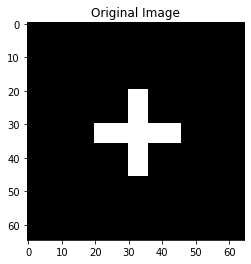

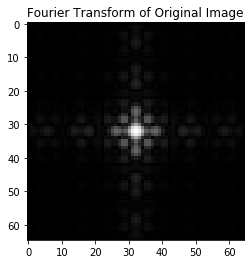

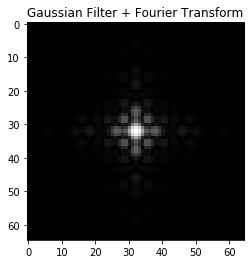

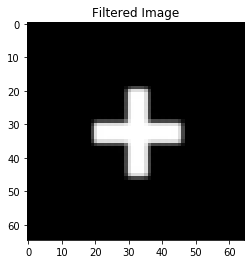

In [8]:
Fourier_Image(im2,sigma=15)

----------

## Task 3

Using the above stated functions, we can simply apply our images to it.

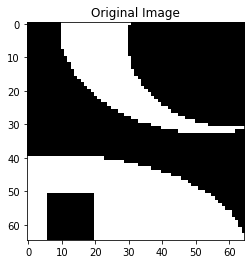

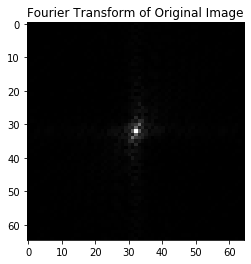

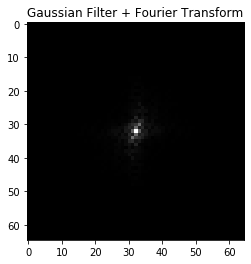

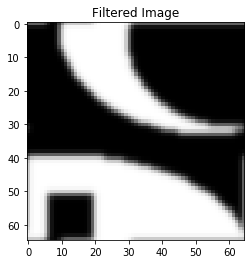

In [9]:
Fourier_Image(im3,sigma=10)

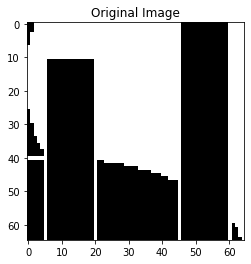

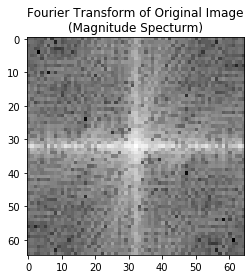

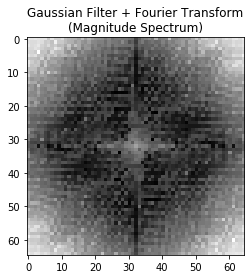

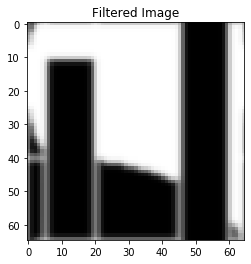

In [10]:
Fourier_Image(im4, sigma=10, log=True)

------------

## Task 4

Now, we observe the transformation of a more complex image. Using our functions stated above, we can do this simply by inputting it into the function.

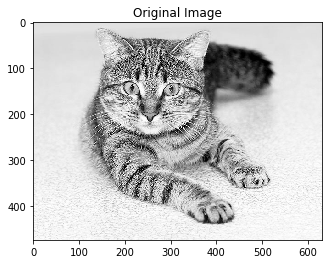

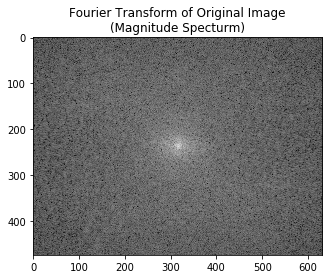

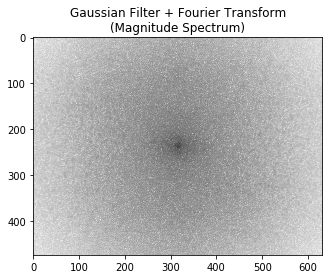

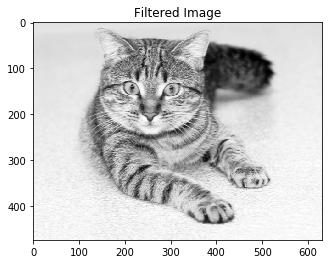

In [11]:
## Opens image and converts it to grey-scale.
##  Once in grey-scale, converts `image` type to `numpy array` type for easier calculations
##  In the `numpy array` type, we can then normalize it by dividing each value by 255, as 255 is the maximum
##   the value can reach in the array.
im = np.asarray(Image.open('cat.jpg').convert('L'))/255

Fourier_Image(im, sigma=150, log=True)

-----------

## Task 5

Now, we try to do the reverse of the previous **Task 4**. Here, we take in a Magnitude Spectrum image, and try to resolve a coherent image.

In [12]:
def Inverse_Fourier_Image(image, sigma=20):
    
    
    """Calculates the Inverse Fourier Transform of a Magnitude Spectrum 
    and returns it to the user
    
    args;
        image := image/array type., represents input image
        sigma := float., repr. standard deviation
        
    Returns 3 images
        1) The Original Image
        2) Magnitude Spectrum
        3) The inverse transformed Magnitude Spectrum"""
    
    
    plt.figure(1)
    plt.imshow(image, cmap='Greys_r')
    plt.title('Original Image')
    plt.show(1)
    
    image = np.exp(image)
    plt.figure(2)
    plt.imshow(image, cmap='Greys_r')
    plt.title('Magnitude Spectrum')
    plt.show(2)
    
    ## Reduces Noise in image
    image /= gaussFilter(image, sigma=sigma)
    
    ## Reverts image back to normal
    image = ifft2(ifftshift(image))
    plt.figure(3)
    plt.imshow(np.abs(np.log(image)), cmap='Greys_r')
    plt.show(3)

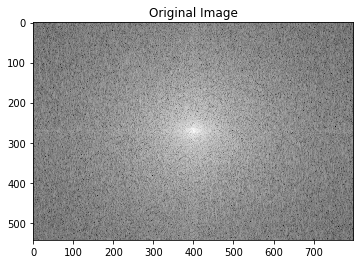

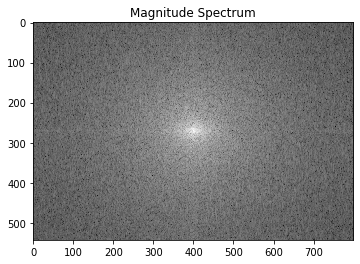

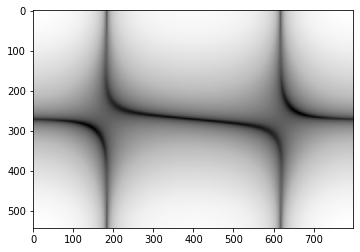

In [13]:
## Similar to the 'cat' picture above
image = np.asarray(Image.open('mag_spec.jpg').convert('L'))/255

Inverse_Fourier_Image(image, sigma=16)

I obtained what seems to be a `tan` function of sorts. I believe this stems from the fact that the image does not have imaginary values for each pixel, thus losing out on half of the information, or the ***Phase*** of the image.


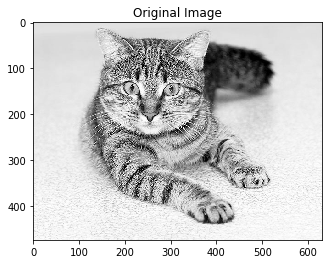

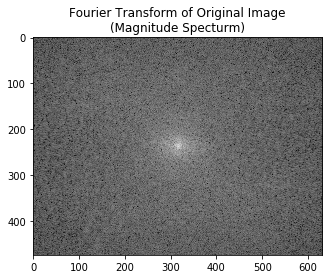

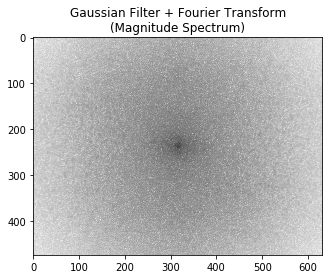

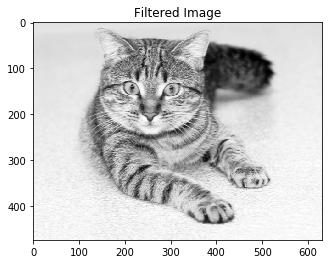

In [14]:
im = np.asarray(Image.open('cat.jpg').convert('L'))/255

cat_mag = Fourier_Image(im, sigma=150, log=True, mag_spec=True)

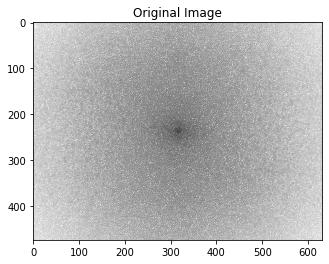

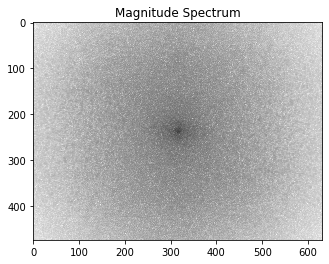

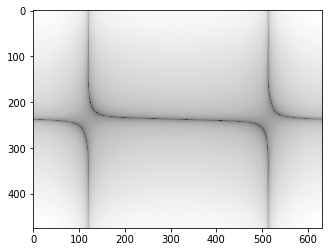

In [15]:
Inverse_Fourier_Image(cat_mag/255, sigma=20)

As we can see, a similar result is obtained from the cat image Magnitude Spectrum. Without the non-real values when doing the inverse transform, we lose our ***Phase*** and image detail is completely lost